# Delaunay Triangulation

## Introduction

Delaunay triangulation is a fundamental geometric structure in computational geometry, named after Boris Delaunay who introduced it in 1934. Given a set of points $P = \{p_1, p_2, \ldots, p_n\}$ in the plane, a Delaunay triangulation is a triangulation $DT(P)$ such that no point in $P$ lies inside the circumcircle of any triangle in $DT(P)$.

## Mathematical Foundation

### The Empty Circumcircle Property

The defining characteristic of Delaunay triangulation is the **empty circumcircle property**. For any triangle $\Delta abc$ in the triangulation with circumcircle $C$, no other point $p \in P$ lies strictly inside $C$.

The circumcenter $(x_c, y_c)$ of a triangle with vertices $(x_1, y_1)$, $(x_2, y_2)$, $(x_3, y_3)$ is given by:

$$x_c = \frac{1}{2D}\begin{vmatrix} x_1^2 + y_1^2 & y_1 & 1 \\ x_2^2 + y_2^2 & y_2 & 1 \\ x_3^2 + y_3^2 & y_3 & 1 \end{vmatrix}$$

$$y_c = \frac{1}{2D}\begin{vmatrix} x_1 & x_1^2 + y_1^2 & 1 \\ x_2 & x_2^2 + y_2^2 & 1 \\ x_3 & x_3^2 + y_3^2 & 1 \end{vmatrix}$$

where:

$$D = \begin{vmatrix} x_1 & y_1 & 1 \\ x_2 & y_2 & 1 \\ x_3 & y_3 & 1 \end{vmatrix}$$

### The InCircle Test

To determine if a point $d = (x_d, y_d)$ lies inside the circumcircle of triangle $\Delta abc$, we compute:

$$\text{InCircle}(a, b, c, d) = \begin{vmatrix} x_a - x_d & y_a - y_d & (x_a - x_d)^2 + (y_a - y_d)^2 \\ x_b - x_d & y_b - y_d & (x_b - x_d)^2 + (y_b - y_d)^2 \\ x_c - x_d & y_c - y_d & (x_c - x_d)^2 + (y_c - y_d)^2 \end{vmatrix}$$

The point $d$ lies:
- **Inside** the circumcircle if $\text{InCircle}(a, b, c, d) > 0$
- **On** the circumcircle if $\text{InCircle}(a, b, c, d) = 0$
- **Outside** the circumcircle if $\text{InCircle}(a, b, c, d) < 0$

### Duality with Voronoi Diagrams

Delaunay triangulation is the **dual graph** of the Voronoi diagram. Each Delaunay edge connects two points whose Voronoi cells share a common edge. This duality relationship is expressed as:

- Each Delaunay vertex corresponds to a Voronoi cell
- Each Delaunay edge is perpendicular to and bisected by the corresponding Voronoi edge
- Each Delaunay triangle corresponds to a Voronoi vertex (the circumcenter)

### Properties

1. **Maximizes minimum angle**: Among all triangulations of $P$, Delaunay triangulation maximizes the minimum angle of all triangles, avoiding skinny triangles.

2. **Uniqueness**: If no four points are cocircular, the Delaunay triangulation is unique.

3. **Complexity**: For $n$ points in general position, the Delaunay triangulation has:
   - At most $2n - 5$ triangles
   - At most $3n - 6$ edges

## Implementation

We will use SciPy's `Delaunay` class which implements the Quickhull algorithm in $O(n \log n)$ expected time. We'll visualize the triangulation and demonstrate the empty circumcircle property.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d
from matplotlib.patches import Circle
from matplotlib.collections import LineCollection

# Set random seed for reproducibility
np.random.seed(42)

# Generate random points
n_points = 20
points = np.random.rand(n_points, 2) * 10

# Compute Delaunay triangulation
tri = Delaunay(points)

print(f"Number of points: {len(points)}")
print(f"Number of triangles: {len(tri.simplices)}")
print(f"Number of edges: {len(tri.convex_hull) + len(tri.simplices) * 3 // 2}")

Number of points: 20
Number of triangles: 31
Number of edges: 53


In [2]:
def compute_circumcircle(p1, p2, p3):
    """
    Compute the circumcenter and circumradius of a triangle.
    
    Parameters:
    -----------
    p1, p2, p3 : array-like
        The three vertices of the triangle
    
    Returns:
    --------
    center : ndarray
        The circumcenter coordinates (x_c, y_c)
    radius : float
        The circumradius
    """
    ax, ay = p1
    bx, by = p2
    cx, cy = p3
    
    d = 2 * (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by))
    
    if abs(d) < 1e-10:
        return None, None
    
    ux = ((ax**2 + ay**2) * (by - cy) + (bx**2 + by**2) * (cy - ay) + (cx**2 + cy**2) * (ay - by)) / d
    uy = ((ax**2 + ay**2) * (cx - bx) + (bx**2 + by**2) * (ax - cx) + (cx**2 + cy**2) * (bx - ax)) / d
    
    center = np.array([ux, uy])
    radius = np.sqrt((ax - ux)**2 + (ay - uy)**2)
    
    return center, radius

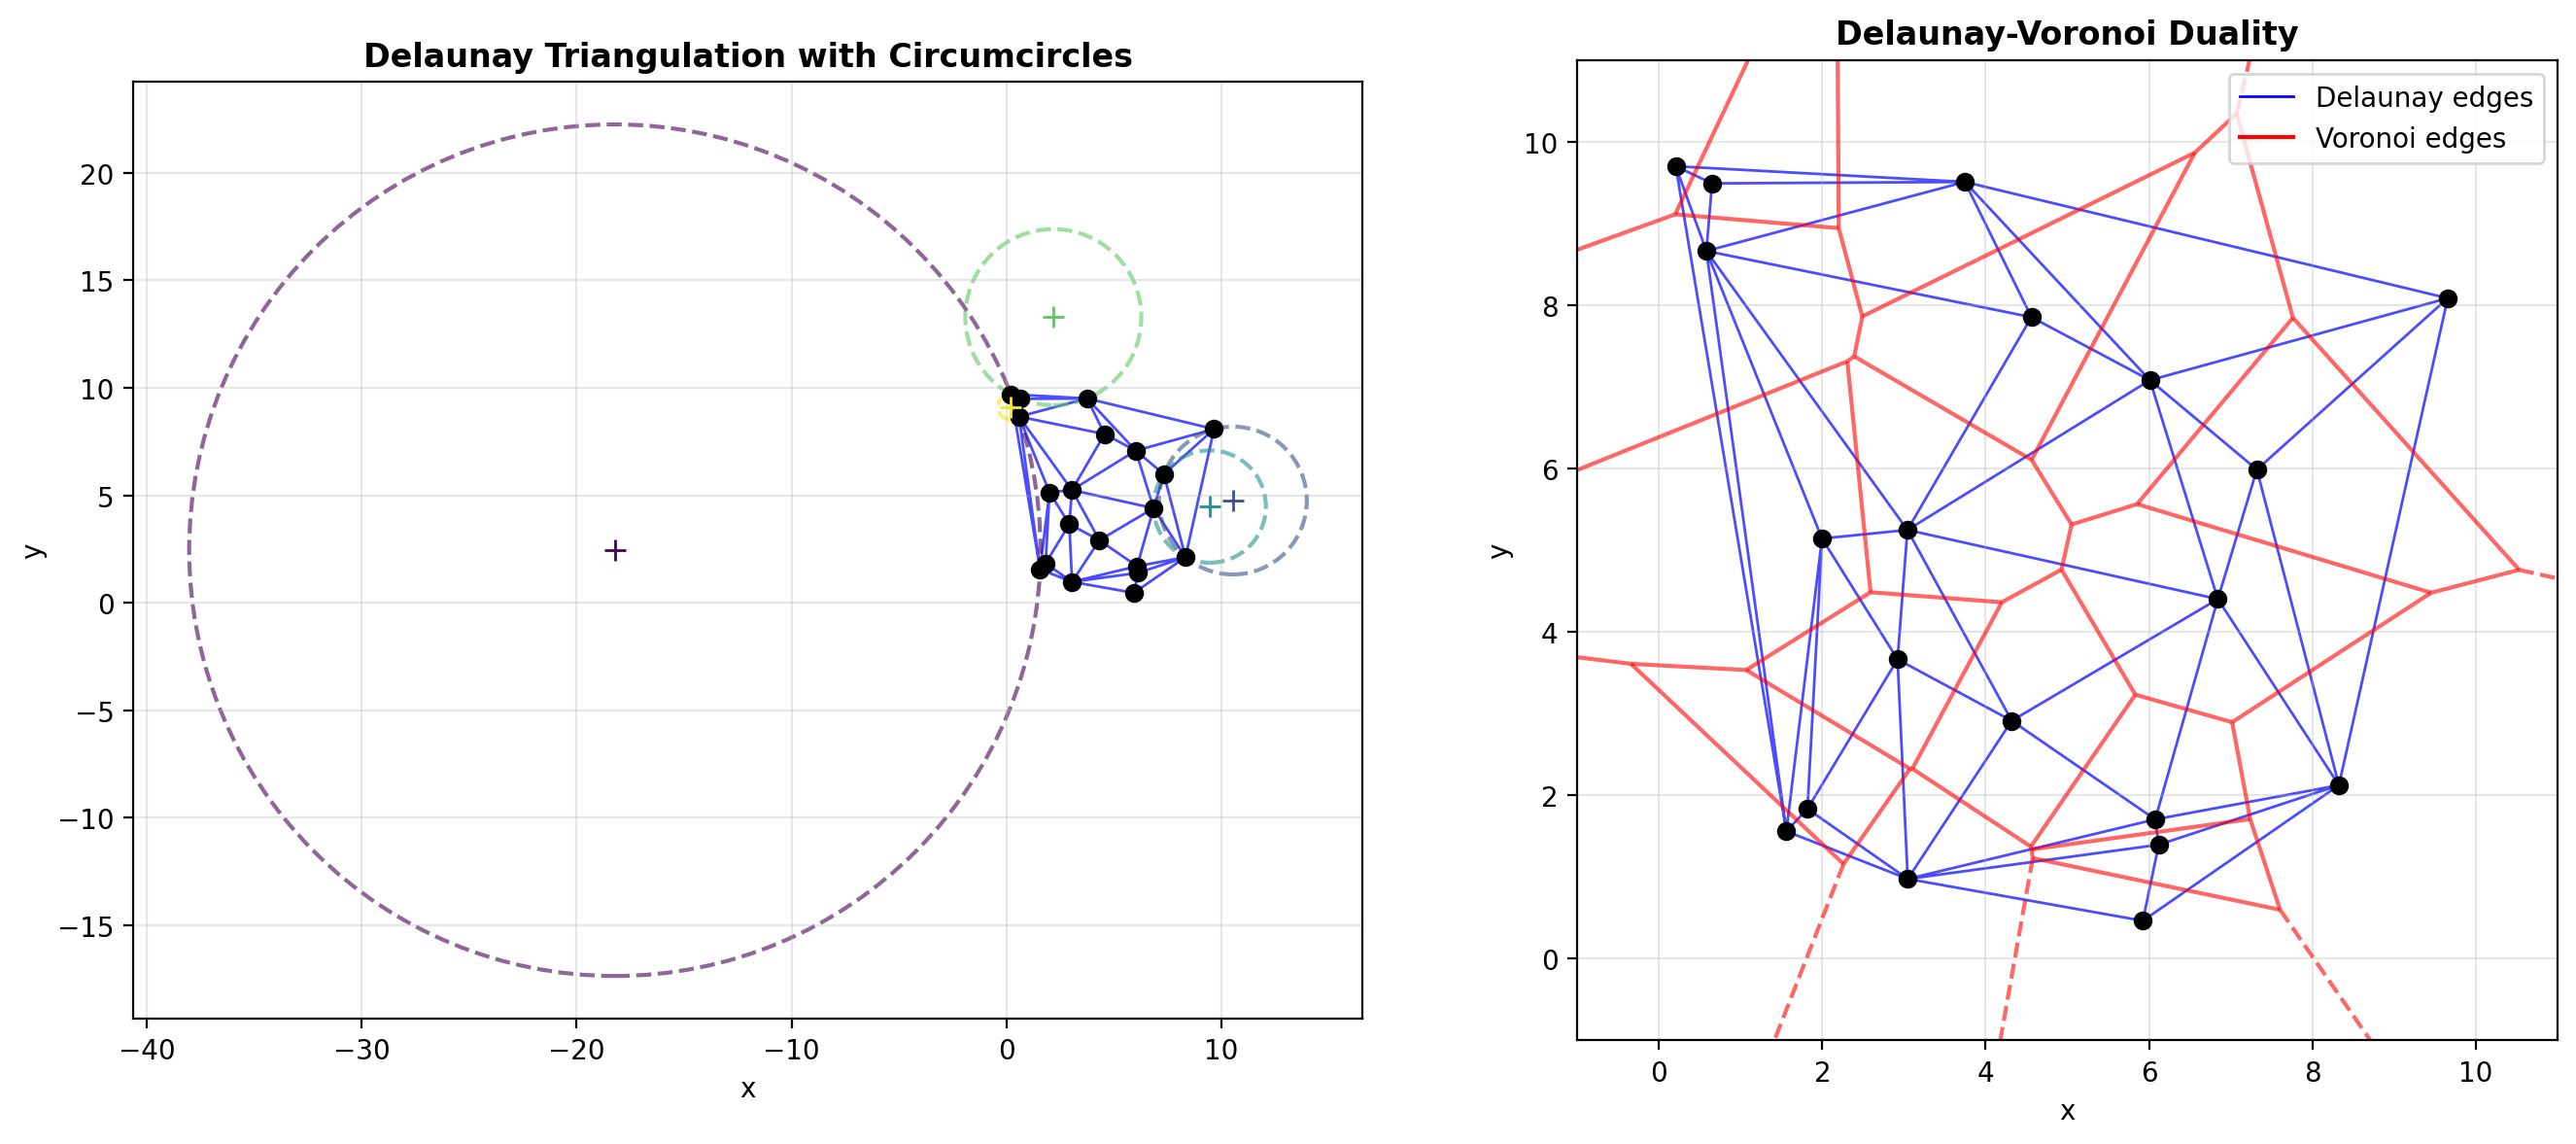


Plot saved to 'plot.png'


In [3]:
# Create the main visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: Delaunay triangulation with circumcircles
ax1 = axes[0]
ax1.set_title('Delaunay Triangulation with Circumcircles', fontsize=12, fontweight='bold')

# Plot triangulation
ax1.triplot(points[:, 0], points[:, 1], tri.simplices, 'b-', linewidth=1, alpha=0.7)
ax1.plot(points[:, 0], points[:, 1], 'ko', markersize=6)

# Draw circumcircles for a subset of triangles
colors = plt.cm.viridis(np.linspace(0, 1, min(5, len(tri.simplices))))
for i, simplex in enumerate(tri.simplices[:5]):
    p1, p2, p3 = points[simplex]
    center, radius = compute_circumcircle(p1, p2, p3)
    
    if center is not None:
        circle = Circle(center, radius, fill=False, color=colors[i], 
                       linewidth=1.5, linestyle='--', alpha=0.6)
        ax1.add_patch(circle)
        ax1.plot(center[0], center[1], '+', color=colors[i], markersize=8)

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

# Right plot: Delaunay-Voronoi duality
ax2 = axes[1]
ax2.set_title('Delaunay-Voronoi Duality', fontsize=12, fontweight='bold')

# Compute Voronoi diagram
vor = Voronoi(points)

# Plot Voronoi diagram
voronoi_plot_2d(vor, ax=ax2, show_vertices=False, line_colors='red', 
                line_width=1.5, line_alpha=0.6, point_size=0)

# Overlay Delaunay triangulation
ax2.triplot(points[:, 0], points[:, 1], tri.simplices, 'b-', linewidth=1, alpha=0.7)
ax2.plot(points[:, 0], points[:, 1], 'ko', markersize=6)

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(-1, 11)
ax2.set_ylim(-1, 11)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

# Add legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='blue', linewidth=1, label='Delaunay edges'),
    Line2D([0], [0], color='red', linewidth=1.5, label='Voronoi edges')
]
ax2.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.savefig('delaunay_triangulation_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Verification of the Empty Circumcircle Property

Let's verify that no point lies inside any circumcircle of the Delaunay triangulation.

In [4]:
def verify_delaunay_property(points, triangulation):
    """
    Verify that no point lies strictly inside any circumcircle.
    
    Returns True if the empty circumcircle property holds for all triangles.
    """
    violations = 0
    
    for simplex in triangulation.simplices:
        p1, p2, p3 = points[simplex]
        center, radius = compute_circumcircle(p1, p2, p3)
        
        if center is None:
            continue
        
        for i, point in enumerate(points):
            if i in simplex:
                continue
            
            distance = np.sqrt((point[0] - center[0])**2 + (point[1] - center[1])**2)
            
            # Allow small numerical tolerance
            if distance < radius - 1e-10:
                violations += 1
    
    return violations == 0, violations

is_valid, num_violations = verify_delaunay_property(points, tri)

if is_valid:
    print("✓ Empty circumcircle property verified!")
    print("  No point lies strictly inside any circumcircle.")
else:
    print(f"✗ Found {num_violations} violations of the empty circumcircle property.")

✓ Empty circumcircle property verified!
  No point lies strictly inside any circumcircle.


## Triangle Quality Analysis

One key advantage of Delaunay triangulation is that it maximizes the minimum angle, producing well-shaped triangles. Let's analyze the angle distribution.

In [5]:
def compute_triangle_angles(p1, p2, p3):
    """
    Compute the three angles of a triangle in degrees.
    """
    # Compute edge lengths
    a = np.linalg.norm(p3 - p2)  # opposite to p1
    b = np.linalg.norm(p1 - p3)  # opposite to p2
    c = np.linalg.norm(p2 - p1)  # opposite to p3
    
    # Use law of cosines to compute angles
    angle_A = np.arccos(np.clip((b**2 + c**2 - a**2) / (2 * b * c), -1, 1))
    angle_B = np.arccos(np.clip((a**2 + c**2 - b**2) / (2 * a * c), -1, 1))
    angle_C = np.arccos(np.clip((a**2 + b**2 - c**2) / (2 * a * b), -1, 1))
    
    return np.degrees([angle_A, angle_B, angle_C])

# Collect all angles
all_angles = []
min_angles = []

for simplex in tri.simplices:
    p1, p2, p3 = points[simplex]
    angles = compute_triangle_angles(p1, p2, p3)
    all_angles.extend(angles)
    min_angles.append(min(angles))

print("Triangle Quality Statistics:")
print(f"  Total number of angles: {len(all_angles)}")
print(f"  Minimum angle: {min(all_angles):.2f}°")
print(f"  Maximum angle: {max(all_angles):.2f}°")
print(f"  Mean angle: {np.mean(all_angles):.2f}°")
print(f"  Mean of minimum angles per triangle: {np.mean(min_angles):.2f}°")

Triangle Quality Statistics:
  Total number of angles: 93
  Minimum angle: 1.60°
  Maximum angle: 167.98°
  Mean angle: 60.00°
  Mean of minimum angles per triangle: 25.02°


## Applications

Delaunay triangulation has numerous applications:

1. **Mesh Generation**: Creating finite element meshes for numerical simulations
2. **Interpolation**: Natural neighbor interpolation for scattered data
3. **Pathfinding**: Navigation meshes in robotics and game development
4. **Geographic Information Systems**: Terrain modeling and spatial analysis
5. **Computer Graphics**: Surface reconstruction from point clouds

## Conclusion

Delaunay triangulation provides an optimal way to connect a set of points, maximizing triangle quality through the empty circumcircle property. Its duality with Voronoi diagrams makes it a cornerstone algorithm in computational geometry with applications spanning scientific computing, computer graphics, and spatial analysis.